### Initialization process

In [62]:
from sqlite3 import connect
from pandas import DataFrame, Timedelta, concat, Series
from ccxt import binance
from datetime import datetime
from collections import defaultdict

In [2]:
conn = connect(".\cryptobot9.db")
cursor = conn.cursor()

### Data preparation

In [3]:
ans = cursor.execute("SELECT * FROM indexes")
rows = ans.fetchall()

tweet_id, user_id, sentments, sent_score, favorited, retweets, created_at, text, hashtags, mentions, urls, type, retweet

In [4]:
df = DataFrame(rows, columns=["index_id", "forecast", "cryptocurrency", "timestamp"])

In [5]:
df.sort_values(by="timestamp", inplace=True)

In [6]:
df_btc = df.loc[df["cryptocurrency"] == "bitcoin"]
df_eth = df.loc[df["cryptocurrency"] == "ethereum"]
df_bnb = df.loc[df["cryptocurrency"] == "binance coin"]

In [7]:
binance_btc = binance().fetchOHLCV("BTCUSDT", timeframe = "1h")
binance_eth = binance().fetchOHLCV("ETHUSDT", timeframe = "1h")
binance_bnb = binance().fetchOHLCV("BNBUSDT", timeframe = "1h")

In [8]:
df_btc["datetime"] = df_btc["timestamp"].apply(lambda x: datetime.fromtimestamp(int(x)).replace(minute=0, second=0))
df_eth["datetime"] = df_eth["timestamp"].apply(lambda x: datetime.fromtimestamp(int(x)).replace(minute=0, second=0))
df_bnb["datetime"] = df_bnb["timestamp"].apply(lambda x: datetime.fromtimestamp(int(x)).replace(minute=0, second=0))

/tmp/ipykernel_10202/287363170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc["datetime"] = df_btc["timestamp"].apply(lambda x: datetime.fromtimestamp(int(x)).replace(minute=0, second=0))
/tmp/ipykernel_10202/287363170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eth["datetime"] = df_eth["timestamp"].apply(lambda x: datetime.fromtimestamp(int(x)).replace(minute=0, second=0))
/tmp/ipykernel_10202/287363170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [9]:
bin_df_btc = DataFrame(binance_btc, columns=["timestamp", "open", "high", "low", "close", "volume"])
bin_df_btc["datetime"] = bin_df_btc["timestamp"].apply(lambda x: datetime.fromtimestamp(x/1000))
bin_df_eth = DataFrame(binance_eth, columns=["timestamp", "open", "high", "low", "close", "volume"])
bin_df_eth["datetime"] = bin_df_eth["timestamp"].apply(lambda x: datetime.fromtimestamp(x/1000))
bin_df_bnb = DataFrame(binance_bnb, columns=["timestamp", "open", "high", "low", "close", "volume"])
bin_df_bnb["datetime"] = bin_df_bnb["timestamp"].apply(lambda x: datetime.fromtimestamp(x/1000))

### Dataframe Bitcoin per time distance

In [10]:
df_btc_now = df_btc.groupby(by="datetime")["forecast"].mean().reset_index()
df_btc_1h = df_btc.groupby(by="datetime")["forecast"].mean().reset_index()
df_btc_1h["datetime"] += Timedelta(1, unit="H")
df_btc_2h = df_btc.groupby(by="datetime")["forecast"].mean().reset_index()
df_btc_2h["datetime"] += Timedelta(2, unit="H")
df_btc_3h = df_btc.groupby(by="datetime")["forecast"].mean().reset_index()
df_btc_3h["datetime"] += Timedelta(3, unit="H")
df_btc_6h = df_btc.groupby(by="datetime")["forecast"].mean().reset_index()
df_btc_6h["datetime"] += Timedelta(6, unit="H")
df_btc_12h = df_btc.groupby(by="datetime")["forecast"].mean().reset_index()
df_btc_12h["datetime"] += Timedelta(12, unit="H")
df_btc_24h = df_btc.groupby(by="datetime")["forecast"].mean().reset_index()
df_btc_24h["datetime"] += Timedelta(1, unit="D")
df_btc_48h = df_btc.groupby(by="datetime")["forecast"].mean().reset_index()
df_btc_48h["datetime"] += Timedelta(2, unit="D")

In [12]:
df_btc_now["open"] = bin_df_btc.loc[bin_df_btc["datetime"].isin(df_btc_now["datetime"])]["open"].values
df_btc_1h["open"] = bin_df_btc.loc[bin_df_btc["datetime"].isin(df_btc_1h["datetime"])]["open"].values
df_btc_2h["open"] = bin_df_btc.loc[bin_df_btc["datetime"].isin(df_btc_2h["datetime"])]["open"].values
df_btc_3h["open"] = bin_df_btc.loc[bin_df_btc["datetime"].isin(df_btc_3h["datetime"])]["open"].values
df_btc_6h["open"] = bin_df_btc.loc[bin_df_btc["datetime"].isin(df_btc_6h["datetime"])]["open"].values
temp_df = bin_df_btc.loc[bin_df_btc["datetime"].isin(df_btc_12h["datetime"])]["open"]
df_btc_12h["open"] = concat([Series([0]*(len(df_btc_12h)-len(temp_df))), temp_df]).values
temp_df = bin_df_btc.loc[bin_df_btc["datetime"].isin(df_btc_24h["datetime"])]["open"]
df_btc_24h["open"] = concat([Series([0]*(len(df_btc_24h)-len(temp_df))), temp_df]).values
temp_df = bin_df_btc.loc[bin_df_btc["datetime"].isin(df_btc_48h["datetime"])]["open"]
df_btc_48h["open"] = concat([Series([0]*(len(df_btc_48h)-len(temp_df))), temp_df]).values

/tmp/ipykernel_10202/4000265616.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_btc_12h["open"] = concat([Series([0]*(len(df_btc_12h)-len(temp_df))), temp_df]).values


### Dataframe Ethereum per time distance

In [13]:
df_eth_now = df_eth.groupby(by="datetime")["forecast"].mean().reset_index()
df_eth_1h = df_eth.groupby(by="datetime")["forecast"].mean().reset_index()
df_eth_1h["datetime"] += Timedelta(1, unit="H")
df_eth_2h = df_eth.groupby(by="datetime")["forecast"].mean().reset_index()
df_eth_2h["datetime"] += Timedelta(2, unit="H")
df_eth_3h = df_eth.groupby(by="datetime")["forecast"].mean().reset_index()
df_eth_3h["datetime"] += Timedelta(3, unit="H")
df_eth_6h = df_eth.groupby(by="datetime")["forecast"].mean().reset_index()
df_eth_6h["datetime"] += Timedelta(6, unit="H")
df_eth_12h = df_eth.groupby(by="datetime")["forecast"].mean().reset_index()
df_eth_12h["datetime"] += Timedelta(12, unit="H")
df_eth_24h = df_eth.groupby(by="datetime")["forecast"].mean().reset_index()
df_eth_24h["datetime"] += Timedelta(1, unit="D")
df_eth_48h = df_eth.groupby(by="datetime")["forecast"].mean().reset_index()
df_eth_48h["datetime"] += Timedelta(2, unit="D")

In [14]:
df_eth_now["open"] = bin_df_eth.loc[bin_df_eth["datetime"].isin(df_eth_now["datetime"])]["open"].values
df_eth_1h["open"] = bin_df_eth.loc[bin_df_eth["datetime"].isin(df_eth_1h["datetime"])]["open"].values
df_eth_2h["open"] = bin_df_eth.loc[bin_df_eth["datetime"].isin(df_eth_2h["datetime"])]["open"].values
df_eth_3h["open"] = bin_df_eth.loc[bin_df_eth["datetime"].isin(df_eth_3h["datetime"])]["open"].values
df_eth_6h["open"] = bin_df_eth.loc[bin_df_eth["datetime"].isin(df_eth_6h["datetime"])]["open"].values
temp_df = bin_df_eth.loc[bin_df_eth["datetime"].isin(df_eth_12h["datetime"])]["open"]
df_eth_12h["open"] = concat([Series([0]*(len(df_eth_12h)-len(temp_df))), temp_df]).values
temp_df = bin_df_eth.loc[bin_df_eth["datetime"].isin(df_eth_24h["datetime"])]["open"]
df_eth_24h["open"] = concat([Series([0]*(len(df_eth_24h)-len(temp_df))), temp_df]).values
temp_df = bin_df_eth.loc[bin_df_eth["datetime"].isin(df_eth_48h["datetime"])]["open"]
df_eth_48h["open"] = concat([Series([0]*(len(df_eth_48h)-len(temp_df))), temp_df]).values

/tmp/ipykernel_10202/2258726641.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_eth_12h["open"] = concat([Series([0]*(len(df_eth_12h)-len(temp_df))), temp_df]).values


### Dataframe Ethereum per time distance

In [15]:
df_bnb_now = df_bnb.groupby(by="datetime")["forecast"].mean().reset_index()
df_bnb_1h = df_bnb.groupby(by="datetime")["forecast"].mean().reset_index()
df_bnb_1h["datetime"] += Timedelta(1, unit="H")
df_bnb_2h = df_bnb.groupby(by="datetime")["forecast"].mean().reset_index()
df_bnb_2h["datetime"] += Timedelta(2, unit="H")
df_bnb_3h = df_bnb.groupby(by="datetime")["forecast"].mean().reset_index()
df_bnb_3h["datetime"] += Timedelta(3, unit="H")
df_bnb_6h = df_bnb.groupby(by="datetime")["forecast"].mean().reset_index()
df_bnb_6h["datetime"] += Timedelta(6, unit="H")
df_bnb_12h = df_bnb.groupby(by="datetime")["forecast"].mean().reset_index()
df_bnb_12h["datetime"] += Timedelta(12, unit="H")
df_bnb_24h = df_bnb.groupby(by="datetime")["forecast"].mean().reset_index()
df_bnb_24h["datetime"] += Timedelta(1, unit="D")
df_bnb_48h = df_bnb.groupby(by="datetime")["forecast"].mean().reset_index()
df_bnb_48h["datetime"] += Timedelta(2, unit="D")

In [16]:
df_bnb_now["open"] = bin_df_bnb.loc[bin_df_bnb["datetime"].isin(df_bnb_now["datetime"])]["open"].values
df_bnb_1h["open"] = bin_df_bnb.loc[bin_df_bnb["datetime"].isin(df_bnb_1h["datetime"])]["open"].values
df_bnb_2h["open"] = bin_df_bnb.loc[bin_df_bnb["datetime"].isin(df_bnb_2h["datetime"])]["open"].values
df_bnb_3h["open"] = bin_df_bnb.loc[bin_df_bnb["datetime"].isin(df_bnb_3h["datetime"])]["open"].values
df_bnb_6h["open"] = bin_df_bnb.loc[bin_df_bnb["datetime"].isin(df_bnb_6h["datetime"])]["open"].values
temp_df = bin_df_bnb.loc[bin_df_bnb["datetime"].isin(df_bnb_12h["datetime"])]["open"]
df_bnb_12h["open"] = concat([Series([0]*(len(df_bnb_12h)-len(temp_df))), temp_df]).values
temp_df = bin_df_bnb.loc[bin_df_bnb["datetime"].isin(df_bnb_24h["datetime"])]["open"]
df_bnb_24h["open"] = concat([Series([0]*(len(df_bnb_24h)-len(temp_df))), temp_df]).values
temp_df = bin_df_bnb.loc[bin_df_bnb["datetime"].isin(df_bnb_48h["datetime"])]["open"]
df_bnb_48h["open"] = concat([Series([0]*(len(df_bnb_48h)-len(temp_df))), temp_df]).values

/tmp/ipykernel_10202/484217101.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_bnb_12h["open"] = concat([Series([0]*(len(df_bnb_12h)-len(temp_df))), temp_df]).values


### Correlation

In [20]:
corr = {
    "btc_0h":df_btc_now[["forecast", "open"]].corr()["open"][0],
    "btc_1h":df_btc_1h[["forecast", "open"]].corr()["open"][0],
    "btc_2h":df_btc_2h[["forecast", "open"]].corr()["open"][0],
    "btc_3h":df_btc_3h[["forecast", "open"]].corr()["open"][0],
    "btc_6h":df_btc_6h[["forecast", "open"]].corr()["open"][0],
    "btc_12h":df_btc_12h[["forecast", "open"]].corr()["open"][0],
    "btc_1d":df_btc_24h[["forecast", "open"]].corr()["open"][0],
    "btc_2d":df_btc_48h[["forecast", "open"]].corr()["open"][0],
    "eth_0h":df_eth_now[["forecast", "open"]].corr()["open"][0],
    "eth_1h":df_eth_1h[["forecast", "open"]].corr()["open"][0],
    "eth_2h":df_eth_2h[["forecast", "open"]].corr()["open"][0],
    "eth_3h":df_eth_3h[["forecast", "open"]].corr()["open"][0],
    "eth_6h":df_eth_6h[["forecast", "open"]].corr()["open"][0],
    "eth_12h":df_eth_12h[["forecast", "open"]].corr()["open"][0],
    "eth_1d":df_eth_24h[["forecast", "open"]].corr()["open"][0],
    "eth_2d":df_eth_48h[["forecast", "open"]].corr()["open"][0],
    "bnb_0h":df_bnb_now[["forecast", "open"]].corr()["open"][0],
    "bnb_1h":df_bnb_1h[["forecast", "open"]].corr()["open"][0],
    "bnb_2h":df_bnb_2h[["forecast", "open"]].corr()["open"][0],
    "bnb_3h":df_bnb_3h[["forecast", "open"]].corr()["open"][0],
    "bnb_6h":df_bnb_6h[["forecast", "open"]].corr()["open"][0],
    "bnb_12h":df_bnb_12h[["forecast", "open"]].corr()["open"][0],
    "bnb_1d":df_bnb_24h[["forecast", "open"]].corr()["open"][0],
    "bnb_2d":df_bnb_48h[["forecast", "open"]].corr()["open"][0]
}

In [21]:
corr

{'btc_0h': 0.15172086456558656,
 'btc_1h': -0.24873156700973148,
 'btc_2h': -0.07687721401842587,
 'btc_3h': -0.012092985357873634,
 'btc_6h': -0.020408788315175244,
 'btc_12h': -0.010054329553099364,
 'btc_1d': 0.19561644879226803,
 'btc_2d': nan,
 'eth_0h': 0.10579726481084044,
 'eth_1h': 0.028868850189259266,
 'eth_2h': 0.03353439872681746,
 'eth_3h': 0.014580478724054638,
 'eth_6h': -0.7206644523878813,
 'eth_12h': 0.5405765545427734,
 'eth_1d': -0.4586160756517969,
 'eth_2d': nan,
 'bnb_0h': -0.3386812109396907,
 'bnb_1h': 0.030194576528928225,
 'bnb_2h': -0.18700647257649008,
 'bnb_3h': -0.4633012073704392,
 'bnb_6h': 0.01799341969234186,
 'bnb_12h': 0.08783150528073844,
 'bnb_1d': -0.6498469642033794,
 'bnb_2d': nan}

### Calculating the percentual forecast

In [22]:
forecast_price = lambda p, tv, t: p + tv if t else tv - p

In [25]:
df_btc_now["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_btc_now[["forecast", "open"]].values][:-1]
df_btc_1h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_btc_1h[["forecast", "open"]].values][:-1]
df_btc_2h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_btc_2h[["forecast", "open"]].values][:-1]
df_btc_3h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_btc_3h[["forecast", "open"]].values][:-1]
df_btc_6h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_btc_6h[["forecast", "open"]].values][:-1]
df_btc_12h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_btc_12h[["forecast", "open"]].values][:-1]
df_btc_24h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_btc_24h[["forecast", "open"]].values][:-1]
df_btc_48h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_btc_48h[["forecast", "open"]].values][:-1]
df_eth_now["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_eth_now[["forecast", "open"]].values][:-1]
df_eth_1h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_eth_1h[["forecast", "open"]].values][:-1]
df_eth_2h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_eth_2h[["forecast", "open"]].values][:-1]
df_eth_3h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_eth_3h[["forecast", "open"]].values][:-1]
df_eth_6h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_eth_6h[["forecast", "open"]].values][:-1]
df_eth_12h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_eth_12h[["forecast", "open"]].values][:-1]
df_eth_24h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_eth_24h[["forecast", "open"]].values][:-1]
df_eth_48h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_eth_48h[["forecast", "open"]].values][:-1]
df_bnb_now["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_bnb_now[["forecast", "open"]].values][:-1]
df_bnb_1h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_bnb_1h[["forecast", "open"]].values][:-1]
df_bnb_2h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_bnb_2h[["forecast", "open"]].values][:-1]
df_bnb_3h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_bnb_3h[["forecast", "open"]].values][:-1]
df_bnb_6h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_bnb_6h[["forecast", "open"]].values][:-1]
df_bnb_12h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_bnb_12h[["forecast", "open"]].values][:-1]
df_bnb_24h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_bnb_24h[["forecast", "open"]].values][:-1]
df_bnb_48h["price_pred"] = [0] + [forecast_price(o*(abs(f)/1000), o, f>=0) for f, o in df_bnb_48h[["forecast", "open"]].values][:-1]

### Calculating precision, accuracy, recall and, f-1 score

In [43]:
def performance_check(forecast, price):
    if price == 0 or forecast == 0:
        return "ND"
    elif forecast > 0 and price > 0:
        return "TP"
    elif forecast < 0 and price < 0:
        return "TN"
    elif forecast > 0 and price < 0:
        return "FP"
    elif forecast < 0 and price > 0:
        return "FN"
    else:
        return "ERR"

In [80]:
dfs_btc = {
    "df_btc_now": df_btc_now, 
    "df_btc_1h": df_btc_1h, 
    "df_btc_2h": df_btc_2h, 
    "df_btc_3h": df_btc_3h, 
    "df_btc_6h": df_btc_6h, 
    "df_btc_12h": df_btc_12h, 
    "df_btc_24h": df_btc_24h 
#     "df_btc_48h": df_btc_48h
}

dfs_eth = {
    "df_eth_now": df_eth_now, 
    "df_eth_1h": df_eth_1h, 
    "df_eth_2h": df_eth_2h, 
    "df_eth_3h": df_eth_3h, 
    "df_eth_6h": df_eth_6h, 
    "df_eth_12h": df_eth_12h, 
    "df_eth_24h": df_eth_24h
#     "df_eth_48h": df_eth_48h
}

dfs_bnb = {
    "df_bnb_now": df_bnb_now, 
    "df_bnb_1h": df_bnb_1h, 
    "df_bnb_2h": df_bnb_2h, 
    "df_bnb_3h": df_bnb_3h, 
    "df_bnb_6h": df_bnb_6h, 
    "df_bnb_12h": df_bnb_12h, 
    "df_bnb_24h": df_bnb_24h
#     "df_bnb_48h": df_bnb_48h
}
dfs = [dfs_btc, dfs_eth, dfs_bnb]

In [81]:
performance = {}
for each_df in dfs:
    for df_name, df in each_df.items():
        results = ["ND"]
        performance[df_name] = {}
        for step in range(1, len(df)):
            results.append(performance_check(df["forecast"][step-1], df["open"][step] - df["open"][step-1]))
        df["performance"] = results
        temp = defaultdict(lambda: 0, df["performance"].value_counts().to_dict())
        performance[df_name] = {
            "accuracy" : temp["TP"] + temp["TN"] / sum(temp.values()),
            "preciosion": temp["TP"] / (temp["TP"] + temp["FP"]),
            "recall": temp["TP"] / (temp["TP"] + temp["FN"]),
            "f1-score": temp["TP"] / (temp["TP"] + 1/2 * (temp["FP"] + temp["FN"]))
        }

In [118]:
df_bnb_24h

,datetime,forecast,open,price_pred,performance
0,2022-08-23 09:00:00,7.212758,0.0,0.000000,ND
1,2022-08-23 10:00:00,6.589048,0.0,0.000000,ND
2,2022-08-23 11:00:00,15.819305,0.0,0.000000,ND
3,2022-08-23 12:00:00,40.261843,0.0,0.000000,ND
4,2022-08-23 13:00:00,9.035561,0.0,0.000000,ND
5,2022-08-23 14:00:00,8.009561,0.0,0.000000,ND
6,2022-08-23 15:00:00,1.949842,298.7,0.000000,TP
7,2022-08-23 16:00:00,0.810513,296.5,299.282418,FP
8,2022-08-23 17:00:00,0.279415,298.3,296.740317,TP
9,2022-08-23 18:00:00,0.672027,298.1,298.383350,FP


Text(0, 0.5, 'precision')

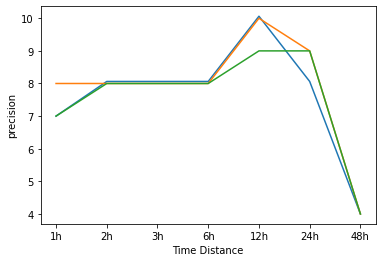

In [93]:
from matplotlib import pyplot

# btc
pyplot.plot(["1h", "2h", "3h", "6h", "12h", "24h", "48h"],
            [value["accuracy"] for key, value in performance.items() if "btc" in key],
            label="btc"
           )
# eth
pyplot.plot(["1h", "2h", "3h", "6h", "12h", "24h", "48h"],
            [value["accuracy"] for key, value in performance.items() if "eth" in key],
            label="eth"
           )
# bnb
pyplot.plot(["1h", "2h", "3h", "6h", "12h", "24h", "48h"],
            [value["accuracy"] for key, value in performance.items() if "bnb" in key],
            label="bnb"
           )

pyplot.xlabel("Time Distance")
pyplot.ylabel("accuracy")

Text(0, 0.5, 'precision')

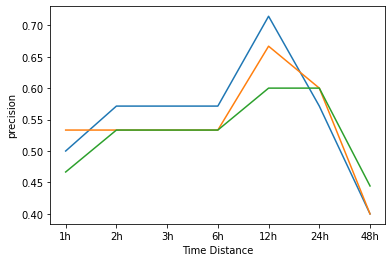

In [94]:
from matplotlib import pyplot

# btc
pyplot.plot(["1h", "2h", "3h", "6h", "12h", "24h", "48h"],
            [value["preciosion"] for key, value in performance.items() if "btc" in key],
            label="btc"
           )
# eth
pyplot.plot(["1h", "2h", "3h", "6h", "12h", "24h", "48h"],
            [value["preciosion"] for key, value in performance.items() if "eth" in key],
            label="eth"
           )
# bnb
pyplot.plot(["1h", "2h", "3h", "6h", "12h", "24h", "48h"],
            [value["preciosion"] for key, value in performance.items() if "bnb" in key],
            label="bnb"
           )

pyplot.xlabel("Time Distance")
pyplot.ylabel("precision")

Text(0, 0.5, 'precision')

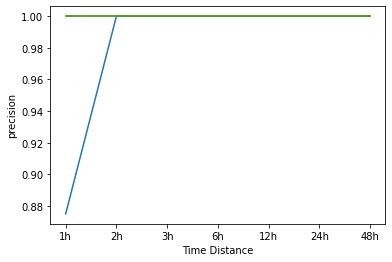

In [95]:
from matplotlib import pyplot

# btc
pyplot.plot(["1h", "2h", "3h", "6h", "12h", "24h", "48h"],
            [value["recall"] for key, value in performance.items() if "btc" in key],
            label="btc"
           )
# eth
pyplot.plot(["1h", "2h", "3h", "6h", "12h", "24h", "48h"],
            [value["recall"] for key, value in performance.items() if "eth" in key],
            label="eth"
           )
# bnb
pyplot.plot(["1h", "2h", "3h", "6h", "12h", "24h", "48h"],
            [value["recall"] for key, value in performance.items() if "bnb" in key],
            label="bnb"
           )

pyplot.xlabel("Time Distance")
pyplot.ylabel("recall")

Text(0, 0.5, 'precision')

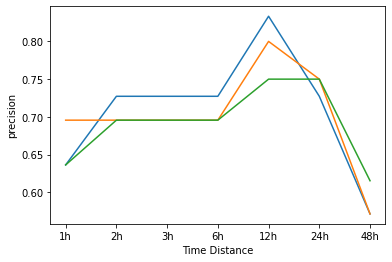

In [96]:
from matplotlib import pyplot

# btc
pyplot.plot(["1h", "2h", "3h", "6h", "12h", "24h", "48h"],
            [value["f1-score"] for key, value in performance.items() if "btc" in key],
            label="btc"
           )
# eth
pyplot.plot(["1h", "2h", "3h", "6h", "12h", "24h", "48h"],
            [value["f1-score"] for key, value in performance.items() if "eth" in key],
            label="eth"
           )
# bnb
pyplot.plot(["1h", "2h", "3h", "6h", "12h", "24h", "48h"],
            [value["f1-score"] for key, value in performance.items() if "bnb" in key],
            label="bnb"
           )

pyplot.xlabel("Time Distance")
pyplot.ylabel("f1-score")

In [85]:
[value["preciosion"] for key, value in performance.items() if "btc" in key]

[0.5,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.7142857142857143,
 0.5714285714285714,
 0.4]